# Morphological Operations

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

dataDir = './data'

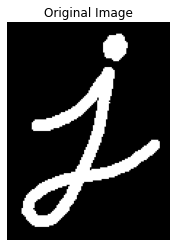

In [2]:
letter = cv2.imread(os.path.join(dataDir, 'j.png'))
kernel = np.ones((5,5), np.uint8)

plt.imshow(letter)
plt.title('Original Image')
plt.axis('off')
plt.show()

### Erosion

This operation erodes away the foreground images' boundaries, meaning that all the pixels near the boundary will be discarded depending upon the size of the kernel. As a result, the thickness or size of the foreground object decreases.

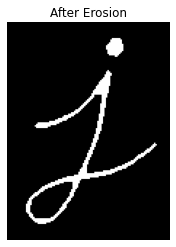

In [3]:
erosionOp = cv2.erode(letter, kernel, iterations = 1)

plt.imshow(erosionOp)
plt.title('After Erosion')
plt.axis('off')
plt.show()

### Dilation

This operation is the reverse of erosion. It increases the size of the foreground object(s) in the image (or it simply increases the size of the white region). This happens because a pixel element is 1 if at least one of the kernel's pixels is 1.

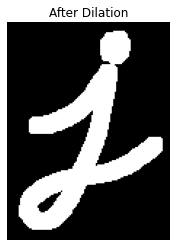

In [4]:
dilationOp = cv2.dilate(letter, kernel, iterations = 1)

plt.imshow(dilationOp)
plt.title('After Dilation')
plt.axis('off')
plt.show()

### Opening

Opening is the name given for the combination of erosion and dilation (in this order). This operation can be used for noise removal purposes. Erosion will remove all the noisy white spots, but it also shrinks the foreground object(s) in the image. So, by applying dilation after erosion, our object(s) return to their original dimension(s). The opening operation can also be useful in joining broken parts of an object.

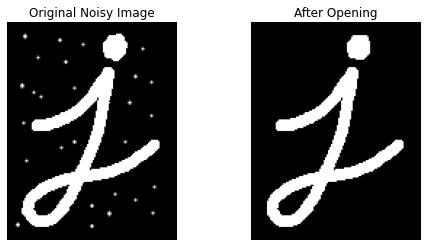

In [8]:
noisyLetterBg = cv2.imread(os.path.join(dataDir, 'jWithNoiseBg.png'))

# Opening = erosion followed by dilation
openingOp = cv2.morphologyEx(noisyLetterBg, cv2.MORPH_OPEN, kernel)

fig, ax = plt.subplots(1,2,figsize=(8,4))

ax[0].imshow(noisyLetterBg)
ax[0].set_title('Original Noisy Image')
ax[0].axis('off')

ax[1].imshow(openingOp)
ax[1].set_title('After Opening')
ax[1].axis('off')

plt.show()

### Closing

Closing applies the same operations as the opening operation but in reverse order (i.e., dilation followed by erosion). This operation is useful for removing spots within the foreground.

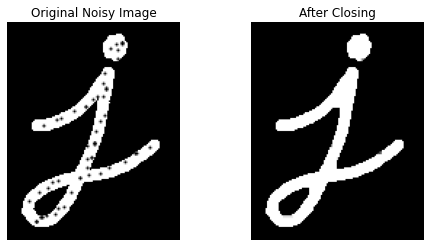

In [9]:
noisyLetterFg = cv2.imread(os.path.join(dataDir, 'jWithNoiseFg.png'))

# Closing = reverse of opening, i.e. dilation followed by erosion
closingOp = cv2.morphologyEx(noisyLetterFg, cv2.MORPH_CLOSE, kernel)

fig, ax = plt.subplots(1,2,figsize=(8,4))

ax[0].imshow(noisyLetterFg)
ax[0].set_title('Original Noisy Image')
ax[0].axis('off')

ax[1].imshow(closingOp)
ax[1].set_title('After Closing')
ax[1].axis('off')

plt.show()

### Morphological Gradient

The morphological gradient is the difference between the dilation and erosion of an image. 

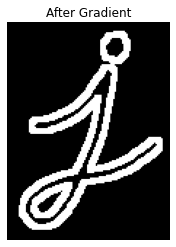

In [10]:
gradientOp = cv2.morphologyEx(letter, cv2.MORPH_GRADIENT, kernel)

plt.imshow(gradientOp)
plt.title('After Gradient')
plt.axis('off')
plt.show()

### Top Hat

This operation is the difference between the input image and the opening of that image.

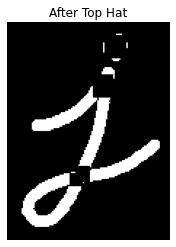

In [11]:
kernelHat = np.ones((9,9), np.uint8)
topHatOp = cv2.morphologyEx(letter, cv2.MORPH_TOPHAT, kernelHat)

plt.imshow(topHatOp)
plt.title('After Top Hat')
plt.axis('off')
plt.show()

### Black Hat

This operation is the difference between the closing of the input image and the image.

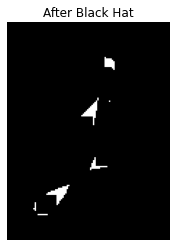

In [12]:
blackHatOp = cv2.morphologyEx(letter, cv2.MORPH_BLACKHAT, kernelHat)

plt.imshow(blackHatOp)
plt.title('After Black Hat')
plt.axis('off')
plt.show()

## Morphological Operations

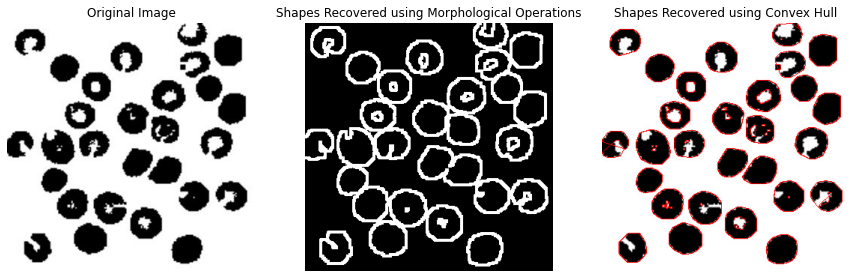

In [87]:
objects = cv2.imread(os.path.join(dataDir, 'roundObjects_03.jpg'))
_, invobjects = cv2.threshold(objects, 127, 255, cv2.THRESH_BINARY_INV)

# Recover the original shape of the objects using morphological operations
kernel = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(invobjects, cv2.MORPH_CLOSE, kernel)
dilation = cv2.dilate(closing, kernel, iterations = 1)
gradient = cv2.morphologyEx(dilation, cv2.MORPH_GRADIENT, kernel)

# Recover the original shape of the objects using the convex hull
threshold = 100
canny_output = cv2.Canny(objects, threshold, threshold * 2)
contours, _ = cv2.findContours(canny_output, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

hull_list = []
for i in range(len(contours)): # Find the convex hull object for each contour
    hull = cv2.convexHull(contours[i])
    hull_list.append(hull)

# Draw contours and the hull results
convex_hull = objects.copy()
cv2.drawContours(convex_hull, hull_list, -1, (255, 0, 0))

fig, ax = plt.subplots(1,3,figsize=(12,8))

ax[0].imshow(objects)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(gradient)
ax[1].set_title('Shapes Recovered using Morphological Operations')
ax[1].axis('off')

ax[2].imshow(convex_hull)
ax[2].set_title('Shapes Recovered using Convex Hull')
ax[2].axis('off')

fig.tight_layout()
fig.subplots_adjust(wspace=0.2)
plt.show()

## Segmentation & Morphological operations

Pebbles found: 12


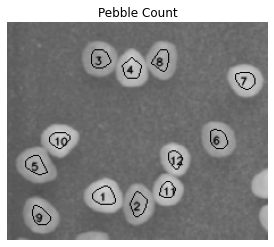

In [227]:
pebbles = cv2.imread(os.path.join(dataDir, 'pebbles.png'), 0)
_, invpebbles = cv2.threshold(pebbles, 127, 255, cv2.THRESH_BINARY)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))
erosionOp = cv2.erode(invpebbles, kernel, iterations = 1)

# Recover the original shape of the objects using the convex hull
contours, hierarchy = cv2.findContours(erosionOp, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img_h, img_w = erosionOp.shape

hull_list = []
for i in range(len(contours)): # Find the convex hull object for each contour
    area = cv2.contourArea(contours[i])
    touches_border = False
    for point in contours[i][0]:
        if point[0] == 0 or point[0] == img_w - 1 or point[1] == 0 or point[1] == img_h - 1:
            touches_border = True
    if not touches_border: # Disregard the pebbles touching the border
        hull = cv2.convexHull(contours[i])
        hull_list.append(hull)
    
# Draw contours and the hull results
convex_hull = erosionOp.copy()
cv2.drawContours(pebbles, hull_list, -1, (0, 255, 0), 1)
pebbles = cv2.cvtColor(pebbles, cv2.COLOR_BGR2RGB)

# Label each pebble
sorted_contours= sorted(hull_list, key=cv2.contourArea, reverse=True)

for (i,c) in enumerate(sorted_contours):
    M = cv2.moments(c)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    cv2.putText(pebbles, text= str(i+1), org=(cx-4,cy+5), fontFace= cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.3, color=(0,0,0), thickness=1, lineType=cv2.LINE_AA)
    
print(f'Pebbles found: {len(hull_list)}')

plt.imshow(pebbles)
plt.title('Pebble Count')
plt.axis('off')
plt.show()

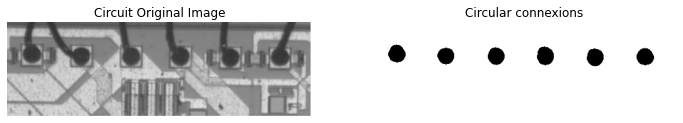

In [229]:
circuit = cv2.imread(os.path.join(dataDir, 'circuit.jpg'), 0)
_, invcircuit = cv2.threshold(circuit, 90, 255, cv2.THRESH_BINARY_INV)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(19,19))
connexions = cv2.morphologyEx(invcircuit, cv2.MORPH_OPEN, kernel)

_, connexions = cv2.threshold(connexions, 90, 255, cv2.THRESH_BINARY_INV)

fig, ax = plt.subplots(1,2,figsize=(12,8))

circuit = cv2.cvtColor(circuit, cv2.COLOR_BGR2RGB)
ax[0].imshow(circuit)
ax[0].set_title('Circuit Original Image')
ax[0].axis('off')

ax[1].imshow(connexions, cmap='gray')
ax[1].set_title('Circular connexions')
ax[1].axis('off')

plt.show()